In [ ]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set style for better looking plots
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# Display settings for pandas - show more rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully.")


Libraries imported successfully!


In [ ]:
!pip install -q kaggle

import json

kaggle_credentials = {
     "username": "minukajayawardana", 
     "key": "KGAT_c2eb93dbbe35e359c880c8fe1e09b1d9" 
}

!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d blastchar/telco-customer-churn

!mkdir -p data
!unzip -o telco-customer-churn.zip -d data/
!rm telco-customer-churn.zip  

print(" Dataset downloaded to data folder.")


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 535MB/s]
Archive:  telco-customer-churn.zip
  inflating: data/WA_Fn-UseC_-Telco-Customer-Churn.csv  
 Dataset downloaded to data folder!


In [3]:

df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display first few rows to see what the data looks like
print("First 5 rows of the dataset:")
print(df.head())

print("\n Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")


First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0        

In [4]:
# Get detailed info about the dataset
print("Dataset Information:")
print(df.info())

print("\n" + "="*50)
print("Statistical Summary of Numerical Columns:")
print(df.describe())

print("\n" + "="*50)
print("Checking for missing values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


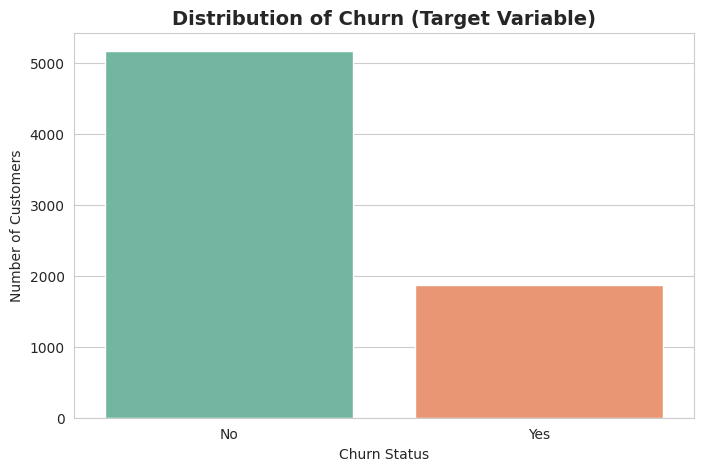

Target variable analyzed !


In [ ]:
# to count how many customers churned and stayed
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualizing the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribution of Churn (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

print("Target variable analyzed.")


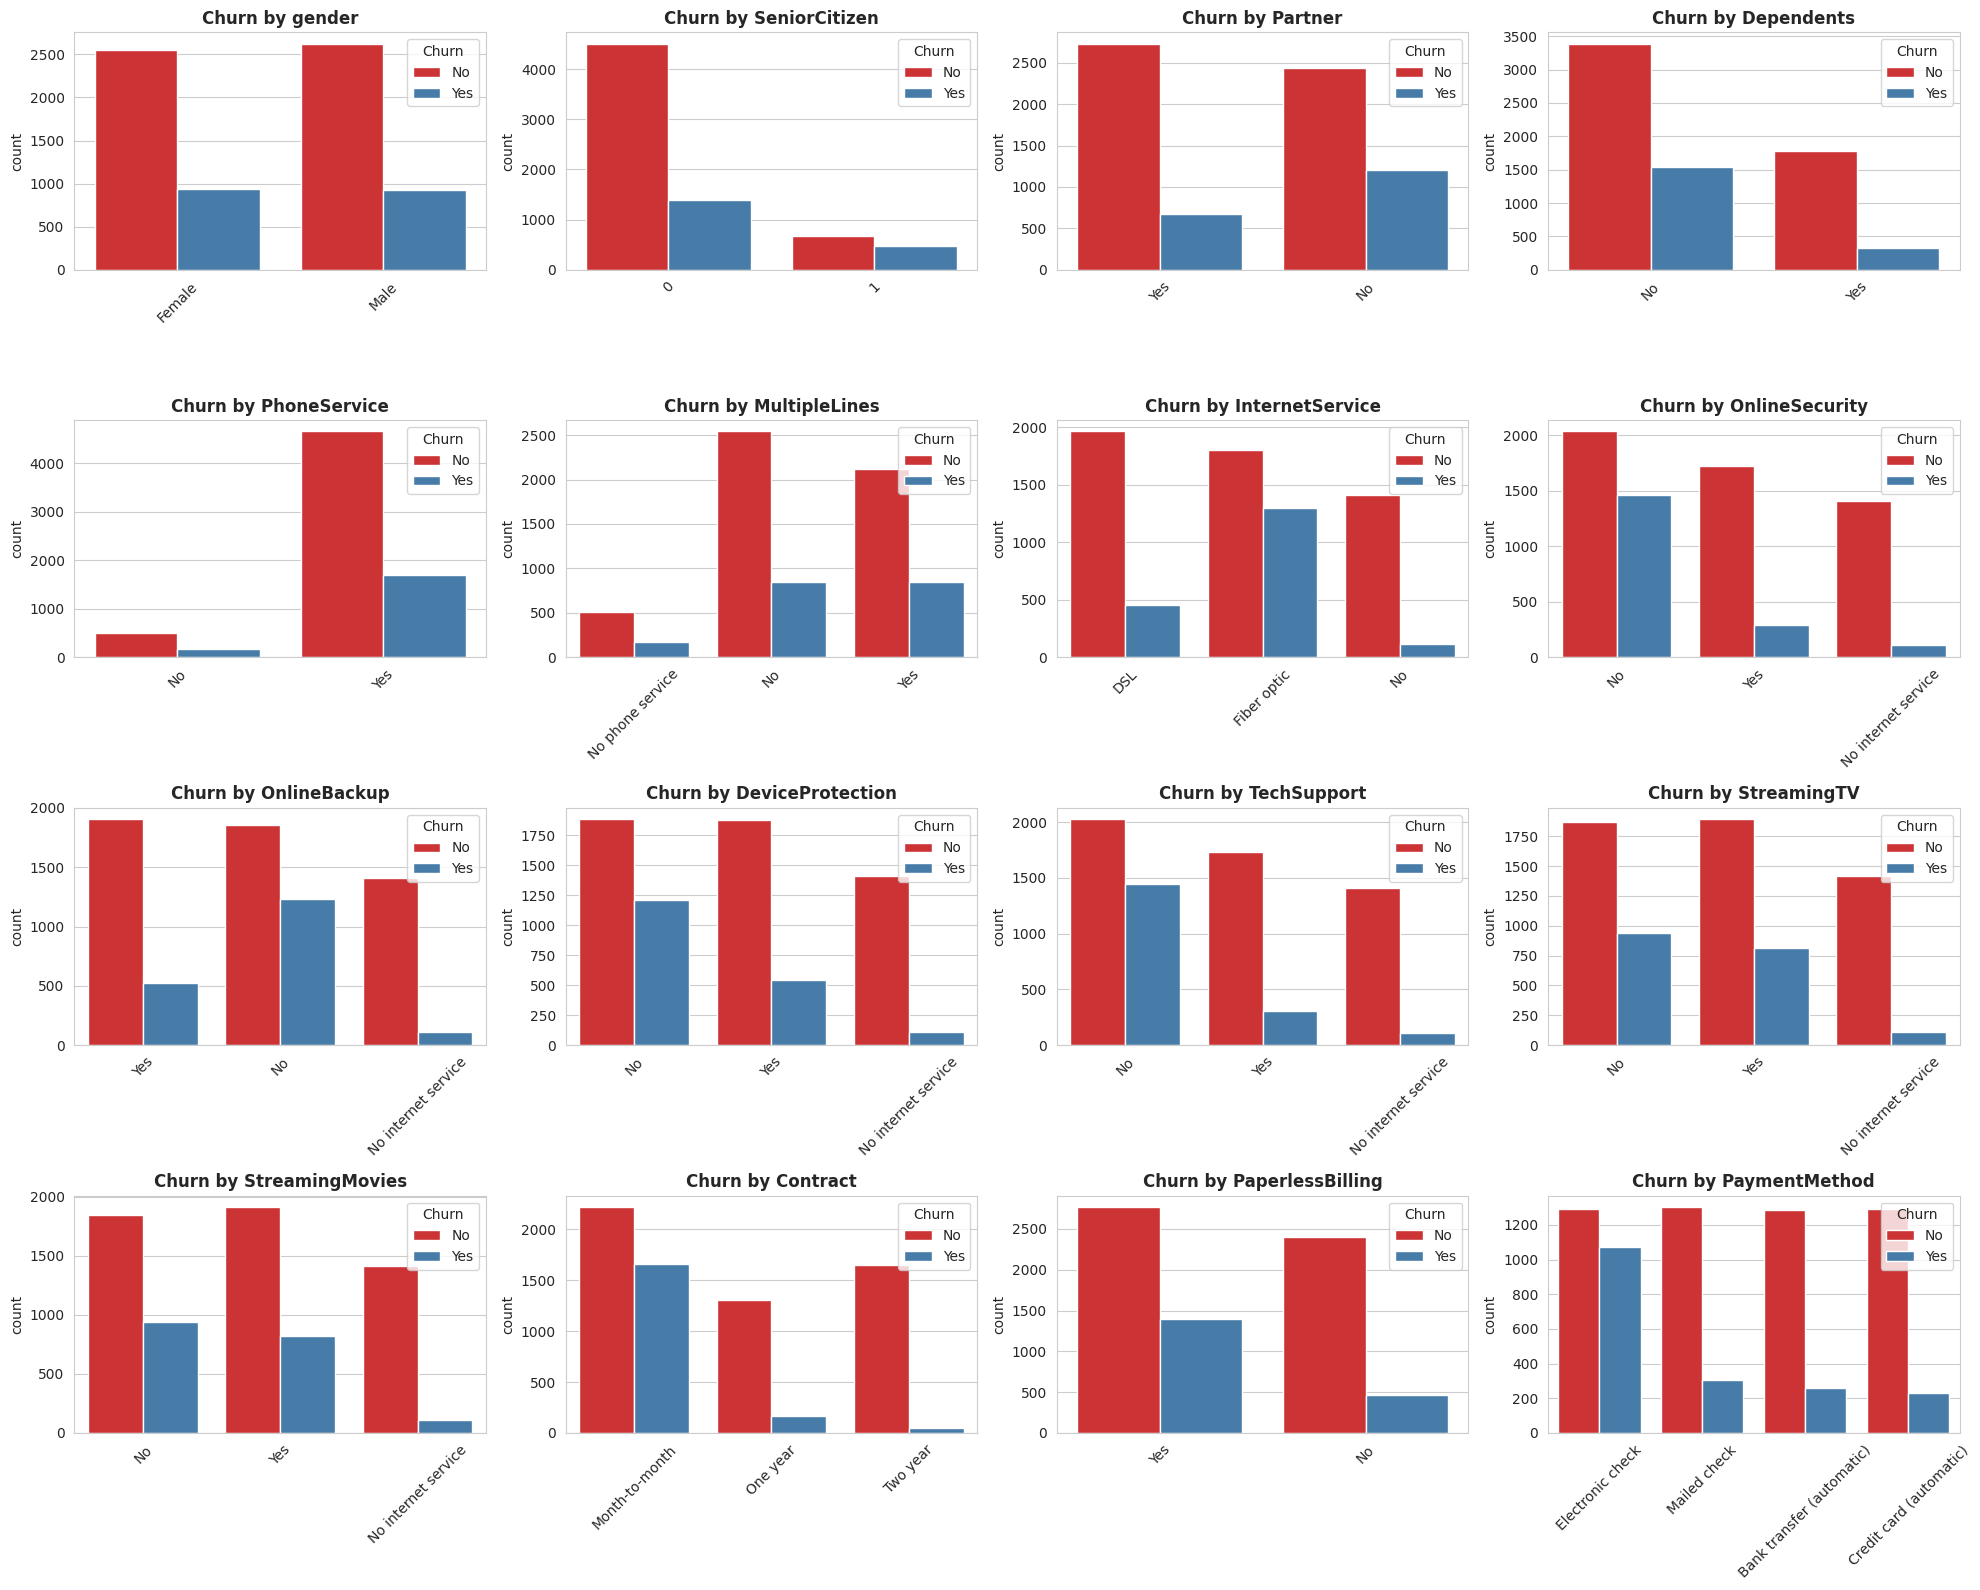

Categorical features visualized!


In [ ]:
# List of categorical columns to analyze
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plotting da churn rate for each categorical feature
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1', ax=axes[idx])
    axes[idx].set_title(f'Churn by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

print("Categorical features visualized.")


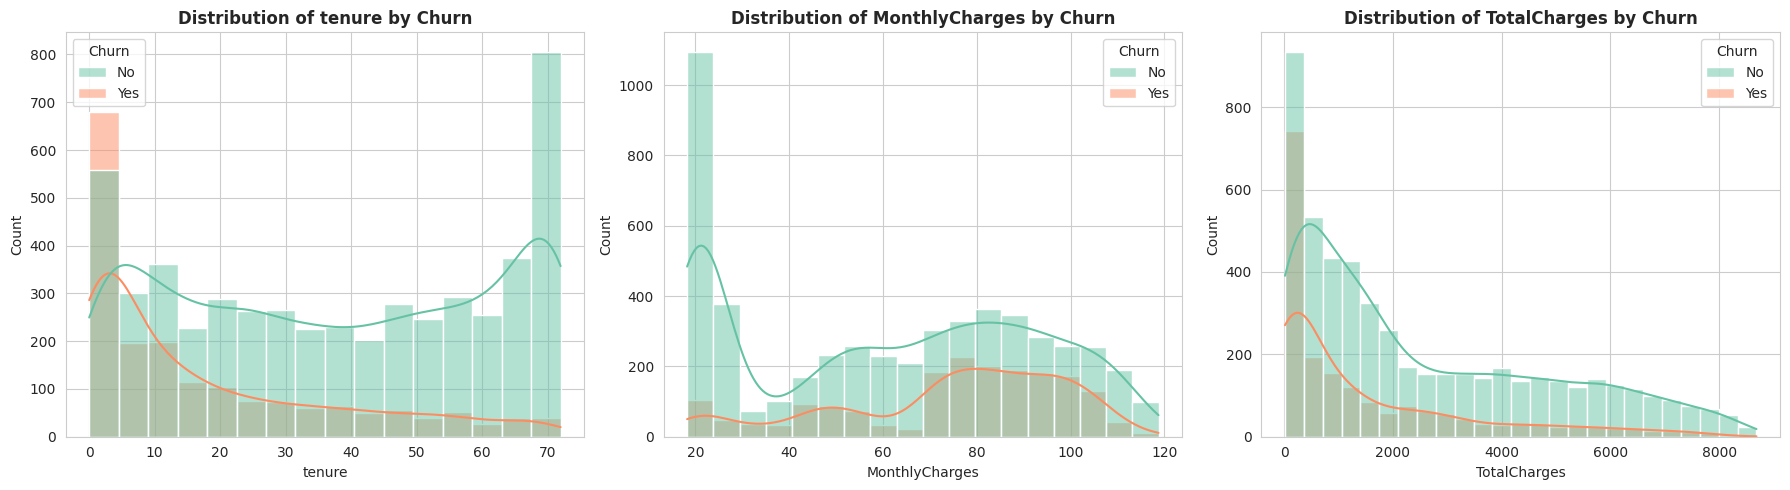

✓ Numerical features visualized!


In [ ]:
# Numerical columns to analyze
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# to fix the TotalCharges cause it  has spaces instead of numbers
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Create distribution plots for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Churn', fontsize=12, fontweight='bold')
    
plt.tight_layout()
plt.show()

print("Numerical features visualized.")


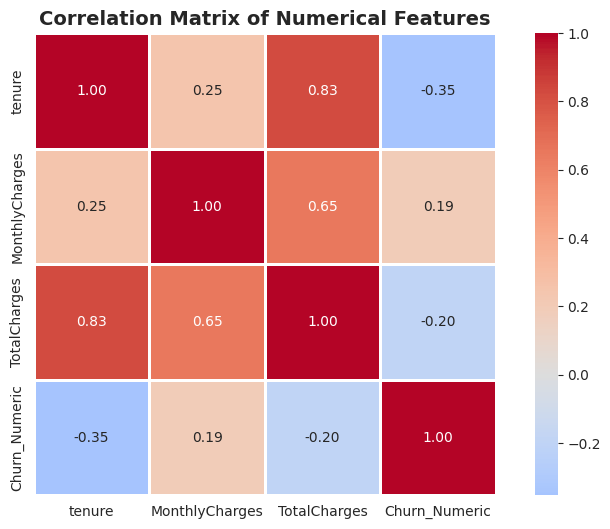

✓ Correlation analysis completed!

Correlation with Churn:
Churn_Numeric     1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn_Numeric, dtype: float64


In [ ]:
# Creating a correlation matrix for numerical features
df['Churn_Numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Selecting only numerical columns for correlation
corr_data = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Numeric']]
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.show()

print("Correlation analysis completed!")
print("\nCorrelation with Churn:")
print(correlation_matrix['Churn_Numeric'].sort_values(ascending=False))


In [15]:
print("."*44)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("."*44)


churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"\n1. Overall churn rate: {churn_rate:.2f}%")

print("\n2. Churn by Contract Type:")
print(df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100)

print("\n3. Average Monthly Charges:")
print(df.groupby('Churn')['MonthlyCharges'].mean())

print("\n4. Average Tenure (months):")
print(df.groupby('Churn')['tenure'].mean())

print("\n5. Churn by Internet Service:")
print(df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100)

print("\n" + "."*44)
print("EDA completed.")


............................................
KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS
............................................

1. Overall churn rate: 26.54%

2. Churn by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

3. Average Monthly Charges:
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

4. Average Tenure (months):
Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

5. Churn by Internet Service:
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980

............................................
EDA completed.
